In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as st

In [2]:
df_formacion_empresa=pd.read_csv('df_a_usar_2.csv')

In [3]:
df_formacion_empresa

,Unnamed: 0,index,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,2,2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,4,4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25968,25968,25968,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25969,25969,25969,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,25970,25970,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25971,25971,25971,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_genero=df_formacion_empresa.loc[:,[ 'index','time', 'age', 'gender','education_q4','sector_q20','experience_q6','company_size_q21','role_q5','anual_income_q25']]
df_genero
#Reduzco el DataFrame a nuestras columnas de interés

,index,time,age,gender,education_q4,sector_q20,experience_q6,company_size_q21,role_q5,anual_income_q25
0,0,910,50-54,Man,Bachelor’s degree,Manufacturing/Fabrication,5-10 years,50-249 employees,Other,"25,000-29,999"
1,1,784,50-54,Man,Master’s degree,Manufacturing/Fabrication,20+ years,"1000-9,999 employees",Program/Project Manager,"60,000-69,999"
2,2,924,22-24,Man,Master’s degree,Academics/Education,1-3 years,"1000-9,999 employees",Software Engineer,$0-999
3,3,575,45-49,Man,Doctoral degree,Academics/Education,20+ years,"1000-9,999 employees",Research Scientist,"30,000-39,999"
4,4,781,45-49,Man,Doctoral degree,Academics/Education,< 1 years,50-249 employees,Other,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...
25968,25968,1756,30-34,Man,Bachelor’s degree,Computers/Technology,1-3 years,"10,000 or more employees",Data Analyst,"15,000-19,999"
25969,25969,253,22-24,Man,Master’s degree,NaN,1-3 years,NaN,Student,NaN
25970,25970,494,50-54,Man,Doctoral degree,Academics/Education,I have never written code,"1000-9,999 employees",Research Scientist,$0-999
25971,25971,277,45-49,Man,Master’s degree,Online Service/Internet-based Services,5-10 years,"10,000 or more employees",Data Scientist,NaN


In [5]:
df_genero['company_size_q21'].isnull().sum()
#averiguo los nulos

9722

In [6]:
df_de_nulos=df_genero[df_genero['company_size_q21'].isna()]
df_de_nulos
# me hago DataFrame para poder estudiarlo un poco

,index,time,age,gender,education_q4,sector_q20,experience_q6,company_size_q21,role_q5,anual_income_q25
5,5,1020,25-29,Woman,I prefer not to answer,NaN,< 1 years,NaN,Currently not employed,NaN
6,6,141,18-21,Woman,Some college/university study without earning ...,NaN,1-3 years,NaN,Student,NaN
8,8,1744,22-24,Man,Bachelor’s degree,NaN,3-5 years,NaN,Currently not employed,NaN
11,11,3081,18-21,Woman,Master’s degree,NaN,< 1 years,NaN,Student,NaN
12,12,1922,18-21,Woman,Master’s degree,NaN,< 1 years,NaN,Student,NaN
...,...,...,...,...,...,...,...,...,...,...
25951,25951,723,22-24,Man,Master’s degree,NaN,1-3 years,NaN,Student,NaN
25956,25956,25145,40-44,Man,Doctoral degree,NaN,10-20 years,NaN,Research Scientist,NaN
25964,25964,484,22-24,Man,Bachelor’s degree,NaN,5-10 years,NaN,Student,NaN
25965,25965,40250,18-21,Man,Master’s degree,NaN,1-3 years,NaN,Data Analyst,NaN


In [7]:
df_de_nulos['role_q5'].value_counts()
#casi todos son desempleados o estudiantes casi 9000

Student                         6804
Currently not employed          1986
Software Engineer                191
Data Scientist                   180
Data Analyst                     130
Machine Learning Engineer        102
Other                             89
Research Scientist                65
Business Analyst                  47
Data Engineer                     38
Program/Project Manager           33
Product Manager                   17
Statistician                      17
DBA/Database Engineer             13
Developer Relations/Advocacy      10
Name: role_q5, dtype: int64

In [8]:
df_de_nulos['anual_income_q25'].value_counts()
#en los nulos, como era de esperar, no hay salarios

Series([], Name: anual_income_q25, dtype: int64)

In [9]:
#podriamos apurar todas las graficas quitando varones, que los minoritarios no se ven :((

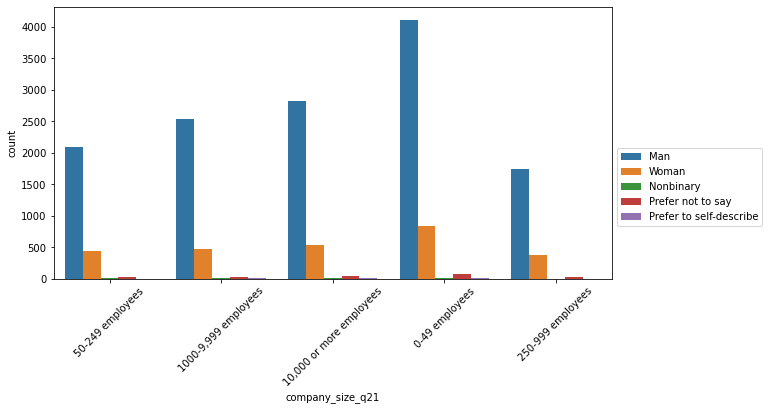

In [10]:
plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.countplot(data =df_genero, x = "company_size_q21", hue = "gender") # hacemos el countplot.
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5));  # movemos la leyenda para colocarla fuera del plot.

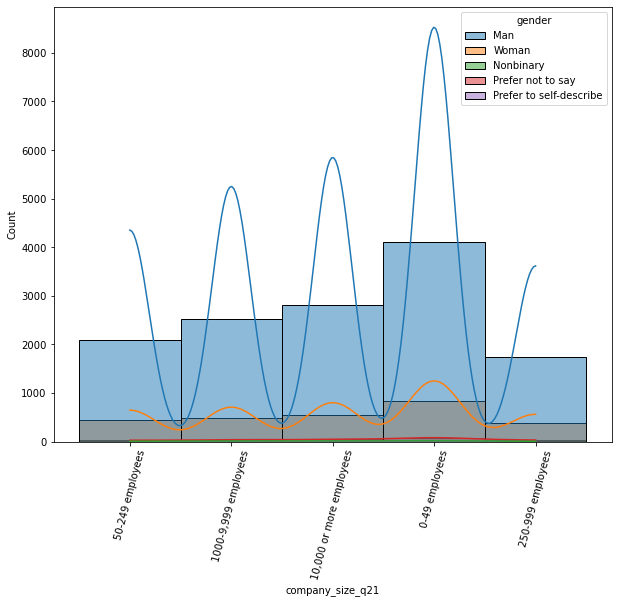

In [11]:
plt.figure(figsize =(10,8))
sns.histplot(x=df_genero['company_size_q21'],data = df_genero, hue='gender', kde=True)
plt.xticks(rotation= 75)
plt.show()
#Representacion por tamaño de empresa de la cantidad de individuos según la identidad de género

In [12]:
df_genero['anual_income_q25'].value_counts()

$0-999              3369
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: anual_income_q25, dtype: int64

In [13]:
df_genero.isnull().sum()
#compruebo nulos de las columnas, para saber cuantos datos perderé por nulos, en este caso 9722 del total porque género no tiene nulos

index                   0
time                    0
age                     0
gender                  0
education_q4            0
sector_q20           9648
experience_q6           0
company_size_q21     9722
role_q5                 0
anual_income_q25    10582
dtype: int64

In [14]:
df_genero['company_size_q21'].value_counts()
#

0-49 employees              5055
10,000 or more employees    3416
1000-9,999 employees        3059
50-249 employees            2567
250-999 employees           2154
Name: company_size_q21, dtype: int64

In [15]:
genero_empresa=pd.DataFrame(df_genero.groupby(['company_size_q21'])['gender'].value_counts())
genero_empresa
#Agrupo los datos en un Dataframe en el que enfrento mis dos variables :género y temaño de empresa

gender
company_size_q21         gender                         
0-49 employees           Man                        4110
                         Woman                       841
                         Prefer not to say            79
                         Nonbinary                    18
                         Prefer to self-describe       7
10,000 or more employees Man                        2818
                         Woman                       538
                         Prefer not to say            44
                         Nonbinary                     9
                         Prefer to self-describe       7
1000-9,999 employees     Man                        2530
                         Woman                       476
                         Prefer not to say            36
                         Nonbinary                    12
                         Prefer to self-describe       5
250-999 employees        Man                        1742
                         Woman                       377
                         Prefer not to say            28
                         Prefer to self-describe       4
                         Nonbinary                     3
50-249 employees         Man                        2097
                         Woman                       435
                         Prefer not to say            26
                         Nonbinary                     7
                         Prefer to self-describe       2

In [16]:
genero_empresa.rename(columns={'gender':'frecuencia'}, inplace= True)
genero_empresa.reset_index()
#reordeno Dataframe

,company_size_q21,gender,frecuencia
0,0-49 employees,Man,4110
1,0-49 employees,Woman,841
2,0-49 employees,Prefer not to say,79
3,0-49 employees,Nonbinary,18
4,0-49 employees,Prefer to self-describe,7
5,"10,000 or more employees",Man,2818
6,"10,000 or more employees",Woman,538
7,"10,000 or more employees",Prefer not to say,44
8,"10,000 or more employees",Nonbinary,9
9,"10,000 or more employees",Prefer to self-describe,7


In [45]:
tamaño_genero=pd.DataFrame(pd.crosstab(df_genero['gender'], df_genero['company_size_q21']))
tamaño_genero
#Hago tabla de frecuencias de las variables

company_size_q21,0-49 employees,"10,000 or more employees","1000-9,999 employees",250-999 employees,50-249 employees
gender,,,,,
Man,4110,2818,2530,1742,2097
Nonbinary,18,9,12,3,7
Prefer not to say,79,44,36,28,26
Prefer to self-describe,7,7,5,4,2
Woman,841,538,476,377,435


quita nulos, asi que nos quedan 16251 registros

In [46]:
tamaño_genero=tamaño_genero.reindex(columns=['0-49 employees','50-249 employees','250-999 employees','1000-9,999 employees','10,000 or more employees'])

A partir de aqui, convierto en arrays mis columnas, para hacer porcentajes y posibles operaciones aritmeticas

In [51]:
mujer=np.array(tamaño_genero2['Woman'])
mujer

array([841, 435, 377, 476, 538])

In [52]:
def porcentaje(array):
    array2=[]
    for i in array:
    #print(i)
        z=i*100/array.sum()
        array2.append(z)
    return np.round(np.array(array2), decimals=2)
    #funcion para hallar porcentajes
    #print(z)

In [53]:
#tamaño_genero["Woman%"] =tamaño_genero_porcentaje (tamaño_genero["'Woman"].apply(porcentaje))

In [54]:
mujer2=porcentaje(mujer)
mujer2

array([31.53, 16.31, 14.14, 17.85, 20.17])

In [55]:
tamaño_genero2['Woman']=mujer2

In [56]:
hombre=np.array(tamaño_genero2['Man'])

In [57]:
hombre2=porcentaje(hombre)

In [58]:
tamaño_genero2['Man']=hombre2

In [59]:
autodeterminados=np.array(tamaño_genero2['Prefer to self-describe'])

In [60]:
autodeterminados2=porcentaje(autodeterminados)

In [61]:
tamaño_genero2['Prefer to self-describe']=autodeterminados2

In [62]:
no_decir=np.array(tamaño_genero2['Prefer not to say'])

In [63]:
no_decir=porcentaje(no_decir)

In [64]:
tamaño_genero2['Prefer not to say']=no_decir

In [65]:
nobinario=np.array(tamaño_genero2['Nonbinary'])

In [66]:
nobinario=porcentaje(nobinario)

In [67]:
tamaño_genero2['Nonbinary']=nobinario

In [68]:
tamaño_genero2
#reconstruyo mi dataframe con los porcentajes, cada porcentaje, se resiere a si mismo, no al tamaño de la empresa, 
# quedamos que debido al sesgo seria mas facil comparar entre ellos mismos, asi, nos sale la prob. de q siendo mujer, estes en un tipo de 
# empresa u otro por ejemplo.

gender,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
company_size_q21,,,,,
0-49 employees,30.91,36.73,37.09,28.0,31.53
50-249 employees,15.77,14.29,12.21,8.0,16.31
250-999 employees,13.10,6.12,13.15,16.0,14.14
"1000-9,999 employees",19.03,24.49,16.90,20.0,17.85
"10,000 or more employees",21.19,18.37,20.66,28.0,20.17


In [72]:
tamaño_gen_est=tamaño_genero2.reset_index()
tamaño_gen_est

gender,company_size_q21,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
0,0-49 employees,30.91,36.73,37.09,28.0,31.53
1,50-249 employees,15.77,14.29,12.21,8.0,16.31
2,250-999 employees,13.10,6.12,13.15,16.0,14.14
3,"1000-9,999 employees",19.03,24.49,16.90,20.0,17.85
4,"10,000 or more employees",21.19,18.37,20.66,28.0,20.17


In [73]:
tamaño_gen_est.columns

Index(['company_size_q21', 'Man', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe', 'Woman'],
      dtype='object', name='gender')

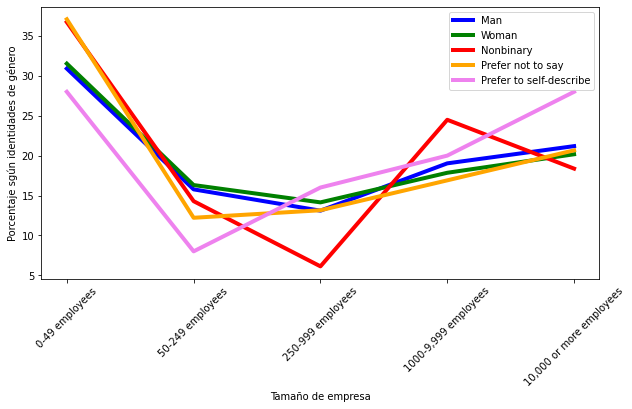

In [74]:
plt.figure(figsize=(10,5))
sns.lineplot(x=tamaño_gen_est['company_size_q21'],y=tamaño_gen_est['Man'], label = 'Man', linewidth = 4, color = 'blue')
sns.lineplot(x=tamaño_gen_est['company_size_q21'],y=tamaño_gen_est['Woman'], label = 'Woman', linewidth = 4, color = 'green')
sns.lineplot(x=tamaño_gen_est['company_size_q21'],y=tamaño_gen_est['Nonbinary'], label = 'Nonbinary', linewidth = 4, color = 'red')
sns.lineplot(x=tamaño_gen_est['company_size_q21'],y=tamaño_gen_est['Prefer not to say'], label = 'Prefer not to say', linewidth = 4, color = 'orange')
sns.lineplot(x=tamaño_gen_est['company_size_q21'],y=tamaño_gen_est['Prefer to self-describe'], label = 'Prefer to self-describe', linewidth = 4, color = 'violet')
plt.xticks(rotation= 45)
plt.ylabel('Porcentaje sgún identidades de género')
plt.xlabel('Tamaño de empresa')
plt.show()
#representacion de porcentajes

**Hombres, mujeres y presumiblemente asemejados a binarios (prefieren no definirse), se distribuyen de forma bastante igual entre los diferentes tamaños de empresa. Las identidades de género no tan binarias, son las que tienen una distribución más desigual hacia pequeña y mediana empresa.**

No se si tiene mucho sentido averiguar sesgos , media, varianza, y/o confianza.

In [ ]:
#histogramas de cada genero segun el tamaño de la empresa (genero_empresa['company_size_q21'])(genero_empresa['gender']=='Man')